In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("diabetes_data.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = data.Outcome.values
x_data = data.drop(["Outcome"],axis=1)

In [4]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
#Normalization or scaling

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.007092,0.174941,0.085106,0.041371,0.000000,0.039716,0.000741,0.059102
1,0.001182,0.100473,0.078014,0.034279,0.000000,0.031442,0.000415,0.036643
2,0.009456,0.216312,0.075650,0.000000,0.000000,0.027541,0.000794,0.037825
3,0.001182,0.105201,0.078014,0.027187,0.111111,0.033215,0.000197,0.024823
4,0.000000,0.161939,0.047281,0.041371,0.198582,0.050946,0.002704,0.039007
...,...,...,...,...,...,...,...,...
763,0.011820,0.119385,0.089835,0.056738,0.212766,0.038889,0.000202,0.074468
764,0.002364,0.144208,0.082742,0.031915,0.000000,0.043499,0.000402,0.031915
765,0.005910,0.143026,0.085106,0.027187,0.132388,0.030969,0.000290,0.035461
766,0.001182,0.148936,0.070922,0.000000,0.000000,0.035579,0.000413,0.055556


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

len(x_train)

8

In [10]:
len(x_test)

8

In [12]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    
    y_head = 1 / (1+np.exp(-z))
    
    return y_head

    

In [13]:
#Calculating the  Loss function
#%% Forward and Backward Propagation

def forward_backward_propagation(w,b,x_train,y_head):
    
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients
    

In [14]:
#%% Updating (Learning) Parameters
    
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
   
    for i in range(number_of_iterarion):
       
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost)) #if section defined to print our cost values in every 10 iteration. We do not need to do that. It's optional.
   
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [15]:
x_test.shape[1]

154

In [16]:
x_train.shape[0]

8

In [17]:
def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction




In [18]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    

    
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))


Cost after iteration 0: 0.693601
Cost after iteration 10: 0.691239
Cost after iteration 20: 0.688997
Cost after iteration 30: 0.686867
Cost after iteration 40: 0.684845
Cost after iteration 50: 0.682925
Cost after iteration 60: 0.681101
Cost after iteration 70: 0.679369
Cost after iteration 80: 0.677725
Cost after iteration 90: 0.676163
Cost after iteration 100: 0.674679
Cost after iteration 110: 0.673269
Cost after iteration 120: 0.671931
Cost after iteration 130: 0.670659
Cost after iteration 140: 0.669450
Cost after iteration 150: 0.668302
Cost after iteration 160: 0.667211
Cost after iteration 170: 0.666174
Cost after iteration 180: 0.665188
Cost after iteration 190: 0.664251
Cost after iteration 200: 0.663361
Cost after iteration 210: 0.662515
Cost after iteration 220: 0.661710
Cost after iteration 230: 0.660945
Cost after iteration 240: 0.660217
Cost after iteration 250: 0.659525
Cost after iteration 260: 0.658867
Cost after iteration 270: 0.658240
Cost after iteration 280: 0.657

Cost after iteration 5840: 0.640186
Cost after iteration 5850: 0.640176
Cost after iteration 5860: 0.640166
Cost after iteration 5870: 0.640157
Cost after iteration 5880: 0.640147
Cost after iteration 5890: 0.640137
Cost after iteration 5900: 0.640128
Cost after iteration 5910: 0.640118
Cost after iteration 5920: 0.640108
Cost after iteration 5930: 0.640099
Cost after iteration 5940: 0.640089
Cost after iteration 5950: 0.640079
Cost after iteration 5960: 0.640070
Cost after iteration 5970: 0.640060
Cost after iteration 5980: 0.640050
Cost after iteration 5990: 0.640041
Cost after iteration 6000: 0.640031
Cost after iteration 6010: 0.640022
Cost after iteration 6020: 0.640012
Cost after iteration 6030: 0.640002
Cost after iteration 6040: 0.639993
Cost after iteration 6050: 0.639983
Cost after iteration 6060: 0.639973
Cost after iteration 6070: 0.639964
Cost after iteration 6080: 0.639954
Cost after iteration 6090: 0.639945
Cost after iteration 6100: 0.639935
Cost after iteration 6110: 0

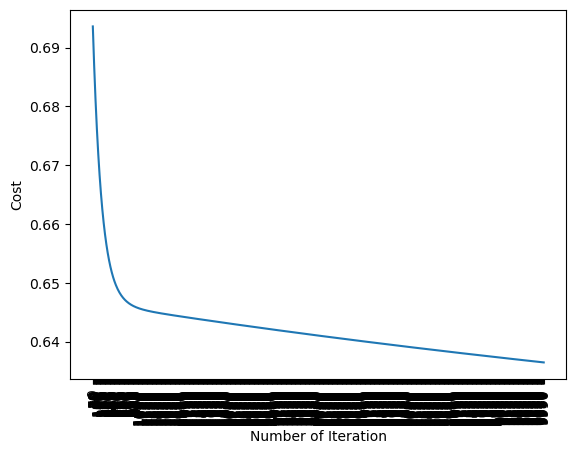

test accuracy: 64.28571428571428 %


In [19]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 10000)

In [20]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])